## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
import libraries

In [3]:
df1 = pd.read_csv('HP_train.csv')
df2 = pd.read_csv('HP_test.csv')

In [4]:
dtrain = df1.copy()
dtest = df2.copy()

In [5]:
dtrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
dtrain.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
dtest.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [9]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Cleaning

In [10]:
dtrain['train'] = 1
dtest['train'] = 0

dtrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  train  
0       WD         Normal     208500      1  
1       WD         Normal     181500      1  
2       WD         Normal     223500      1  
3       WD        Abnorml     140000      1  
4       WD         Normal     250000      1  

[5 rows x 82 columns]

In [11]:
dtest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  train  
0      6   2010        WD         Normal      0  
1      6   2010        WD         Normal      0  
2      3   2010        WD         Normal      0  
3      6   2010        WD         Normal      0  
4      1   2010        WD         Normal      0  

[5 rows x 81 columns]

#### combinig both the data to apply same method

In [12]:
df = pd.concat([dtrain,dtest],axis=0,sort = False)

In [13]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  train  
0       WD         Normal   208500.0      1  
1       WD         Normal   181500.0      1  
2       WD         Normal   223500.0      1  
3       WD        Abnorml   140000.0      1  
4       WD         Normal   250000.0      1  

[5 rows x 82 columns]

#### percentage of missing values

In [14]:
df.isnull().sum()/1460*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.273973
LotFrontage      33.287671
LotArea           0.000000
                   ...    
YrSold            0.000000
SaleType          0.068493
SaleCondition     0.000000
SalePrice        99.931507
train             0.000000
Length: 82, dtype: float64

In [15]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

column_name  percentage
0              Id    0.000000
1      MSSubClass    0.000000
2        MSZoning    0.137033
3     LotFrontage   16.649538
4         LotArea    0.000000
..            ...         ...
77         YrSold    0.000000
78       SaleType    0.034258
79  SaleCondition    0.000000
80      SalePrice   49.982871
81          train    0.000000

[82 rows x 2 columns]

#### Select rows  with percentage greater than 50 Data is Missing

In [16]:
NAN = NAN[NAN.percentage > 50]
NAN

column_name  percentage
6         Alley   93.216855
72       PoolQC   99.657417
73        Fence   80.438506
74  MiscFeature   96.402878

#### Dropping all columns with high % of Missing Values

In [17]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis =1)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

#### Selecting numerical and categorical features

In [18]:
object_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(exclude=['object'])

###  Handling Categorical Data

In [19]:
null_counts = object_df.isnull().sum()
null_counts

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [20]:
columns_None = ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu']
object_df[columns_None] = object_df[columns_None].fillna(object_df.mode().iloc[0])

C:\Users\ANKIT\OneDrive\Documents\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
object_df

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgCr       Norm       Norm  ...          Gd        Typ   
1         Veenker      Feedr       Norm  ...          TA        Typ   
2         CollgCr       Norm       Norm  ...          Gd        Typ   
3         Crawfor       Norm       Norm  ...          Gd        Typ   
4         NoRidge       Norm       Norm  ...          Gd        Typ   
...           ...        ...        ...  ...         ...        ...   
1454      MeadowV       Norm       Norm  ...          TA        Typ   
1455      MeadowV       Norm       Norm  ...          TA        Typ   
1456      Mitchel       Norm       Norm  ...          TA        Typ   
1457      Mitchel       Norm       Norm  ...          TA        Typ   
1458      Mitchel       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1454          Gd     Attchd          Unf         TA         TA          Y   
1455          Gd    CarPort          Unf         TA         TA          Y   
1456          TA     Detchd          Unf         TA         TA          Y   
1457          Gd     Attchd          Unf         TA         TA          Y   
1458          TA     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1454       WD        Normal  
1455       WD       Abnorml  
1456       WD       Abnorml  
1457       WD        Normal  
1458       WD        Normal  

[2919 rows x 39 columns]

In [22]:
columns_low = ['SaleType','Functional','KitchenQual','Electrical','MasVnrType','Exterior2nd','Exterior1st','Utilities','MSZoning']
object_df[columns_None] = object_df[columns_None].fillna('None')

C:\Users\ANKIT\OneDrive\Documents\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
object_df

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgCr       Norm       Norm  ...          Gd        Typ   
1         Veenker      Feedr       Norm  ...          TA        Typ   
2         CollgCr       Norm       Norm  ...          Gd        Typ   
3         Crawfor       Norm       Norm  ...          Gd        Typ   
4         NoRidge       Norm       Norm  ...          Gd        Typ   
...           ...        ...        ...  ...         ...        ...   
1454      MeadowV       Norm       Norm  ...          TA        Typ   
1455      MeadowV       Norm       Norm  ...          TA        Typ   
1456      Mitchel       Norm       Norm  ...          TA        Typ   
1457      Mitchel       Norm       Norm  ...          TA        Typ   
1458      Mitchel       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1454          Gd     Attchd          Unf         TA         TA          Y   
1455          Gd    CarPort          Unf         TA         TA          Y   
1456          TA     Detchd          Unf         TA         TA          Y   
1457          Gd     Attchd          Unf         TA         TA          Y   
1458          TA     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1454       WD        Normal  
1455       WD       Abnorml  
1456       WD       Abnorml  
1457       WD        Normal  
1458       WD        Normal  

[2919 rows x 39 columns]

### Handling Numerical Data

In [24]:
null_count = numerical_df.isnull().sum()
null_count

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64

In [25]:
print((numerical_df['YrSold']-numerical_df['YearBuilt']).median())

35.0


In [26]:
print((numerical_df['LotFrontage'].median()))

68.0


###### filling LotFrontage with Median

In [27]:
numerical_df['LotFrontage'] = numerical_df['LotFrontage'].fillna(68.0)

<ipython-input-27-b71d43383d71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['LotFrontage'] = numerical_df['LotFrontage'].fillna(68.0)


In [28]:
numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].fillna(numerical_df['YrSold']-35)

<ipython-input-28-e20215283a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].fillna(numerical_df['YrSold']-35)


In [29]:
numerical_df = numerical_df.fillna(0)

In [30]:
numerical_df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  OpenPorchSF  \
0          2003          2003       196.0       706.0  ...           61   
1          1976          1976         0.0       978.0  ...            0   
2          2001          2002       162.0       486.0  ...           42   
3          1915          1970         0.0       216.0  ...           35   
4          2000          2000       350.0       655.0  ...           84   
...         ...           ...         ...         ...  ...          ...   
1454       1970          1970         0.0         0.0  ...            0   
1455       1970          1970         0.0       252.0  ...           24   
1456       1960          1996         0.0      1224.0  ...            0   
1457       1992          1992         0.0       337.0  ...           32   
1458       1993          1994        94.0       758.0  ...           48   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0          0            0         0        0      12   
...             ...        ...          ...       ...      ...     ...   
1454              0          0            0         0        0       6   
1455              0          0            0         0        0       4   
1456              0          0            0         0        0       9   
1457              0          0            0         0      700       7   
1458              0          0            0         0        0      11   

      YrSold  SalePrice  train  
0       2008   208500.0      1  
1       2007   181500.0      1  
2       2008   223500.0      1  
3       2006   140000.0      1  
4       2008   250000.0      1  
...      ...        ...    ...  
1454    2006        0.0      0  
1455    2006        0.0      0  
1456    2006        0.0      0  
1457    2006        0.0      0  
1458    2006        0.0      0  

[2919 rows x 39 columns]

In [31]:
null_count = numerical_df.isnull().sum()
null_count

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
train            0
dtype: int64

#### Checking for low variance

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

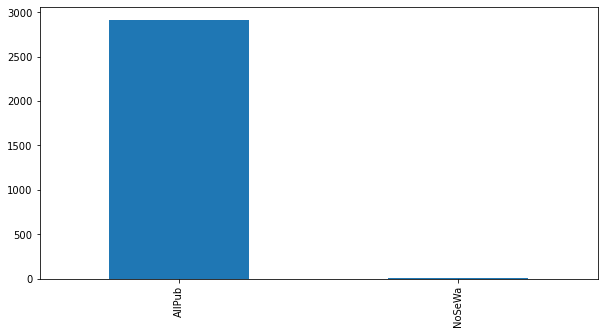

In [32]:
object_df['Utilities'].value_counts().plot(kind ='bar',figsize=[10,5])
object_df['Utilities'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

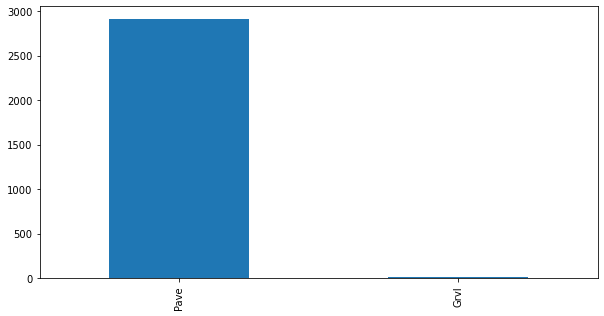

In [33]:
object_df['Street'].value_counts().plot(kind ='bar',figsize=[10,5])
object_df['Street'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

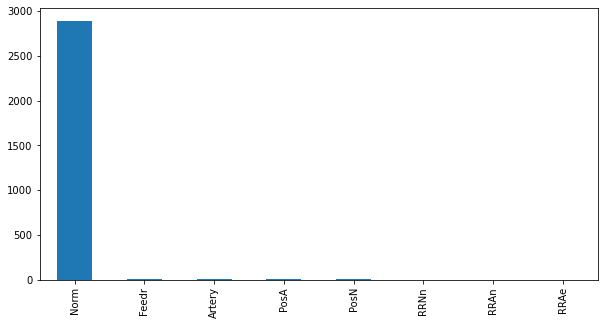

In [34]:
object_df['Condition2'].value_counts().plot(kind ='bar',figsize=[10,5])
object_df['Condition2'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

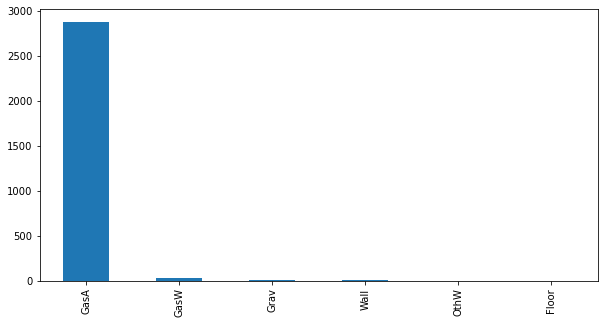

In [35]:
object_df['Heating'].value_counts().plot(kind ='bar',figsize=[10,5])
object_df['Heating'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Membran       1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

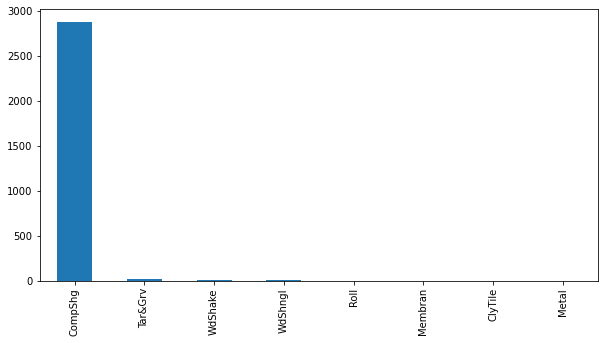

In [36]:
object_df['RoofMatl'].value_counts().plot(kind ='bar',figsize=[10,5])
object_df['RoofMatl'].value_counts()

In [37]:
object_df.drop(['RoofMatl','Heating','Condition2','Street','Utilities'],axis=1)

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood  \
0          RL      Reg         Lvl    Inside       Gtl      CollgCr   
1          RL      Reg         Lvl       FR2       Gtl      Veenker   
2          RL      IR1         Lvl    Inside       Gtl      CollgCr   
3          RL      IR1         Lvl    Corner       Gtl      Crawfor   
4          RL      IR1         Lvl       FR2       Gtl      NoRidge   
...       ...      ...         ...       ...       ...          ...   
1454       RM      Reg         Lvl    Inside       Gtl      MeadowV   
1455       RM      Reg         Lvl    Inside       Gtl      MeadowV   
1456       RL      Reg         Lvl    Inside       Gtl      Mitchel   
1457       RL      Reg         Lvl    Inside       Gtl      Mitchel   
1458       RL      Reg         Lvl    Inside       Mod      Mitchel   

     Condition1 BldgType HouseStyle RoofStyle  ... KitchenQual Functional  \
0          Norm     1Fam     2Story     Gable  ...          Gd        Typ   
1         Feedr     1Fam     1Story     Gable  ...          TA        Typ   
2          Norm     1Fam     2Story     Gable  ...          Gd        Typ   
3          Norm     1Fam     2Story     Gable  ...          Gd        Typ   
4          Norm     1Fam     2Story     Gable  ...          Gd        Typ   
...         ...      ...        ...       ...  ...         ...        ...   
1454       Norm    Twnhs     2Story     Gable  ...          TA        Typ   
1455       Norm   TwnhsE     2Story     Gable  ...          TA        Typ   
1456       Norm     1Fam     1Story     Gable  ...          TA        Typ   
1457       Norm     1Fam     SFoyer     Gable  ...          TA        Typ   
1458       Norm     1Fam     2Story     Gable  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1454          Gd     Attchd          Unf         TA         TA          Y   
1455          Gd    CarPort          Unf         TA         TA          Y   
1456          TA     Detchd          Unf         TA         TA          Y   
1457          Gd     Attchd          Unf         TA         TA          Y   
1458          TA     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1454       WD        Normal  
1455       WD       Abnorml  
1456       WD       Abnorml  
1457       WD        Normal  
1458       WD        Normal  

[2919 rows x 34 columns]

## Feature Engineering

#### creating new columns

In [38]:
numerical_df['Age_House'] = numerical_df['YrSold'] - numerical_df['YearBuilt']

In [39]:
numerical_df['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [40]:
neg = numerical_df[numerical_df['Age_House']<0]
neg

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1089  2550          20        128.0    39290           10            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  EnclosedPorch  \
1089       2008          2009      1224.0      4010.0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
1089          0            0         0    17000      10    2007        0.0   

      train  Age_House  
1089      0         -1  

[1 rows x 40 columns]

In [41]:
numerical_df.loc[numerical_df['YrSold']<numerical_df['YearBuilt'],'YrSold'] =2009
numerical_df['Age_House'] = numerical_df['YrSold'] - numerical_df['YearBuilt']
numerical_df['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [42]:
numerical_df['TotalBsmtBath'] = numerical_df['BsmtFullBath'] + (0.5)*numerical_df['BsmtHalfBath']
numerical_df['TotalBath'] = numerical_df['FullBath'] + (1/2)*numerical_df['HalfBath']
numerical_df['TotalSurfaceArea'] = numerical_df['1stFlrSF'] + numerical_df['2ndFlrSF'] + numerical_df['TotalBsmtSF']

In [43]:
numerical_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  PoolArea  MiscVal  MoSold  \
0          2003       196.0       706.0  ...         0        0       2   
1          1976         0.0       978.0  ...         0        0       5   
2          2002       162.0       486.0  ...         0        0       9   
3          1970         0.0       216.0  ...         0        0       2   
4          2000       350.0       655.0  ...         0        0      12   

   YrSold  SalePrice  train  Age_House  TotalBsmtBath  TotalBath  \
0    2008   208500.0      1          5            1.0        2.5   
1    2007   181500.0      1         31            0.5        2.0   
2    2008   223500.0      1          7            1.0        2.5   
3    2006   140000.0      1         91            1.0        1.0   
4    2008   250000.0      1          8            1.0        2.5   

   TotalSurfaceArea  
0            2566.0  
1            2524.0  
2            2706.0  
3            2473.0  
4            3343.0  

[5 rows x 43 columns]

In [44]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':0,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_df['ExterQual'] = object_df['ExterQual'].map(bin_map)
object_df['ExterCond'] = object_df['ExterCond'].map(bin_map)
object_df['BsmtCond'] = object_df['BsmtCond'].map(bin_map)
object_df['BsmtQual'] = object_df['BsmtQual'].map(bin_map)
object_df['HeatingQC'] = object_df['HeatingQC'].map(bin_map)
object_df['KitchenQual'] = object_df['KitchenQual'].map(bin_map)
object_df['FireplaceQu'] = object_df['FireplaceQu'].map(bin_map)
object_df['GarageQual'] = object_df['GarageQual'].map(bin_map)
object_df['GarageCond'] = object_df['GarageCond'].map(bin_map)
object_df['CentralAir'] = object_df['CentralAir'].map(bin_map)
object_df['LotShape'] = object_df['LotShape'].map(bin_map)
object_df['BsmtExposure'] = object_df['BsmtExposure'].map(bin_map)
object_df['BsmtFinType1'] = object_df['BsmtFinType1'].map(bin_map)
object_df['BsmtFinType2'] = object_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_df['PavedDrive'] = object_df['PavedDrive'].map(PavedDrive)

<ipython-input-44-8b76ab168b46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df['ExterQual'] = object_df['ExterQual'].map(bin_map)
<ipython-input-44-8b76ab168b46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df['ExterCond'] = object_df['ExterCond'].map(bin_map)
<ipython-input-44-8b76ab168b46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [45]:
#Select categorical features
rest_object_columns = object_df.select_dtypes(include=['object'])

#Using One hot encoder
object_df = pd.get_dummies(object_df, columns=rest_object_columns.columns)

In [46]:
object_df.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2           2.0   
1         3          2          2         4         2           4.0   
2         2          4          2         4         2           2.0   
3         2          2          2         2         4           2.0   
4         2          4          2         4         2           3.0   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  ...  SaleType_ConLw  \
0             6             1          4           1  ...               0   
1             5             1          4           1  ...               0   
2             6             1          4           1  ...               0   
3             5             1          4           1  ...               0   
4             6             1          4           1  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 188 columns]

In [47]:
df_final = pd.concat([object_df, numerical_df], axis=1,sort=False)
df_final.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2           2.0   
1         3          2          2         4         2           4.0   
2         2          4          2         4         2           2.0   
3         2          2          2         2         4           2.0   
4         2          4          2         4         2           3.0   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  ...  PoolArea  MiscVal  \
0             6             1          4           1  ...         0        0   
1             5             1          4           1  ...         0        0   
2             6             1          4           1  ...         0        0   
3             5             1          4           1  ...         0        0   
4             6             1          4           1  ...         0        0   

   MoSold  YrSold  SalePrice  train  Age_House  TotalBsmtBath  TotalBath  \
0       2    2008   208500.0      1          5            1.0        2.5   
1       5    2007   181500.0      1         31            0.5        2.0   
2       9    2008   223500.0      1          7            1.0        2.5   
3       2    2006   140000.0      1         91            1.0        1.0   
4      12    2008   250000.0      1          8            1.0        2.5   

   TotalSurfaceArea  
0            2566.0  
1            2524.0  
2            2706.0  
3            2473.0  
4            3343.0  

[5 rows x 231 columns]

In [48]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [49]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [52]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_train,target,test_size=0.3)

In [53]:
print(Xtrain.shape,Ytrain.shape)

(1022, 228) (1022,)


In [54]:
dt = RandomForestRegressor(criterion='mae',n_jobs=-1, n_estimators=10,max_depth=6, min_samples_leaf=1, random_state=3)

In [1]:
dt.fit(Xtrain,Ytrain)

NameError: name 'dt' is not defined